In [3]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # gets the path to the desktop
file_path = os.path.join(desktop_path, 'data.json')

print(file_path)
# open the JSON file and read its contents
with open(file_path, 'r') as file:
    data = json.load(file)

print("Data entries:", len(data))
amountOfGamesPlayed = int(len(data) / 2)
print("Games played by both strategies:", amountOfGamesPlayed)

C:\Users\Darwin\Desktop\response.json
Data entries: 1000
Games played by both strategies: 500


In [11]:
randomVisits = []
worstWinPercentageRandom = []
bestWinPercentageRandom = []

ucb1Visits = []
worstWinPercentageUCB1 = []
bestWinPercentageUCB1 = []

gamesWonRandom = 0
gamesWonUCB1 = 0
averageMovesPlayedRandom = 0
averageMovesPlayedUCB1 = 0

timeTakenPerGameRandom = []
timeTakenPerGameUCB1 = []

randomGames = []
UCB1Games = []

# mapping over the data and printing key-value pairs for each entry
for key, value in data.items():
    # print(f"Entry {key}:")
    if(value.get("gameStatus") != "won"):
        continue
        
    # Fully-Random: calculate statistics
    if(value.get("gameType") == "Full-Random"):
        randomGames.append(value)
        gamesWonRandom+=1
        averageMovesPlayedRandom+=len(value.get("playedMoves"))
        
        resultHistoryRandom = value.get("resultsHistory")
        
        timeTakenRandom = 0
        for index in range(len(resultHistoryRandom)):
            result = resultHistoryRandom[index]
            timeTakenRandom+=result['duration']

            if "worstWinnabilityPercentage" in result:
                worstWinPercentage = result['worstWinnabilityPercentage']
            else:
                worstWinPercentage = 100
                
            if "bestWinnabilityPercentage" in result:
                bestWinPercentage = result['bestWinnabilityPercentage']
            else:
                bestWinPercentage = 100
            
            if index >= len(randomVisits):
                randomVisits.append(0)
            if index >= len(worstWinPercentageRandom):
                worstWinPercentageRandom.append(0)
            if index >= len(bestWinPercentageRandom):
                bestWinPercentageRandom.append(0)
                
            randomVisits[index]+=1
            worstWinPercentageRandom[index]+=worstWinPercentage
            bestWinPercentageRandom[index]+=bestWinPercentage
            
        timeTakenPerGameRandom.append(timeTakenRandom / 1000 / 60)
            
    # UCB1: calculate statistics 
    if(value.get("gameType") == "UCB1"):
        UCB1Games.append(value)
        gamesWonUCB1+=1
        averageMovesPlayedUCB1+=len(value.get("playedMoves"))
        
        resultHistoryUCB1 = value.get("resultsHistory")
        
        timeTakenUCB1 = 0
        for index in range(len(resultHistoryUCB1)):
            result = resultHistoryUCB1[index]
            timeTakenUCB1+=result['duration']

            if "worstWinnabilityPercentage" in result:
                worstWinPercentage = result['worstWinnabilityPercentage']
            else:
                worstWinPercentage = 100
                
            if "bestWinnabilityPercentage" in result:
                bestWinPercentage = result['bestWinnabilityPercentage']
            else:
                bestWinPercentage = 100
            
            if index >= len(ucb1Visits):
                ucb1Visits.append(0)
            if index >= len(worstWinPercentageUCB1):
                worstWinPercentageUCB1.append(0)
            if index >= len(bestWinPercentageUCB1):
                bestWinPercentageUCB1.append(0)
                
            ucb1Visits[index]+=1
            worstWinPercentageUCB1[index]+=worstWinPercentage
            bestWinPercentageUCB1[index]+=bestWinPercentage
            
        timeTakenPerGameUCB1.append(timeTakenUCB1 / 1000 / 60)
            

# finalize Fully-Random data
finalWorstWinPercentageRandom = []
finalBestWinPercentageRandom = []
for index in range(len(worstWinPercentageRandom)):
    worstResult = worstWinPercentageRandom[index] / randomVisits[index]
    bestResult = bestWinPercentageRandom[index] / randomVisits[index]
    
    finalWorstWinPercentageRandom.append(worstResult)
    finalBestWinPercentageRandom.append(bestResult)

# finalize UCB1 data
finalWorstWinPercentageUCB1 = []
finalBestWinPercentageUCB1 = []
for index in range(len(worstWinPercentageUCB1)):
    worstResult = worstWinPercentageUCB1[index] / ucb1Visits[index]
    bestResult = bestWinPercentageUCB1[index] / ucb1Visits[index]
    
    finalWorstWinPercentageUCB1.append(worstResult)
    finalBestWinPercentageUCB1.append(bestResult)
    

    
averageTimeTakenRandom = timeTakenRandom / gamesWonRandom / 1000 / 60
averageTimeTakenUCB1 = timeTakenUCB1 / gamesWonUCB1 / 1000 / 60
print("average moves played random:", averageMovesPlayedRandom / gamesWonRandom)
print("random wins:", gamesWonRandom)
print("random winrate:", (gamesWonRandom / amountOfGamesPlayed) * 100)

print("------------------------")

print("average moves played ucb1:", averageMovesPlayedUCB1 / gamesWonUCB1)
print("ucb1 wins:", gamesWonUCB1)
print("ucb1 winrate:", (gamesWonUCB1 / amountOfGamesPlayed) * 100)

average moves played random: 51.24221453287197
random wins: 289
random winrate: 57.8
------------------------
average moves played ucb1: 50.90035587188612
ucb1 wins: 281
ucb1 winrate: 56.2


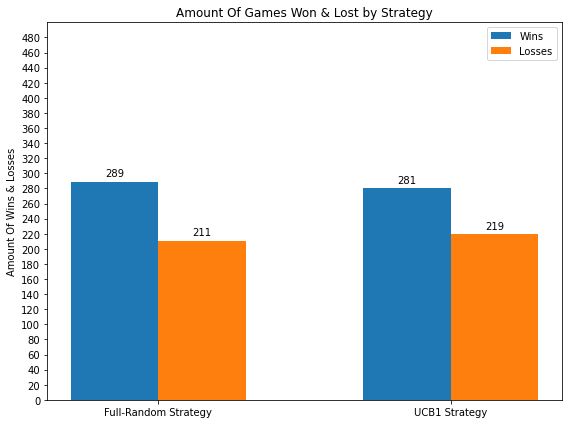

In [12]:
wins_A = gamesWonRandom
losses_A = amountOfGamesPlayed - gamesWonRandom
wins_B = gamesWonUCB1
losses_B = amountOfGamesPlayed - gamesWonUCB1

# define the number of groups and the width of each bar
num_groups = 2
bar_width = 0.3

# define the index for the x-axis
index = np.arange(num_groups)

# plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(index, [wins_A, wins_B], bar_width, label='Wins')
bar2 = ax.bar(index + bar_width, [losses_A, losses_B], bar_width, label='Losses')

# adding labels and title
ax.set_ylabel('Amount Of Wins & Losses')
ax.set_title('Amount Of Games Won & Lost by Strategy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Full-Random Strategy', 'UCB1 Strategy'])
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

# set the range of y-axis
plt.ylim(0, amountOfGamesPlayed)  # Adjust the range
# set y-axis ticks to integer values
plt.yticks(range(0, amountOfGamesPlayed, 20))  # Adjust the range

plt.tight_layout()
# show plot
plt.show()

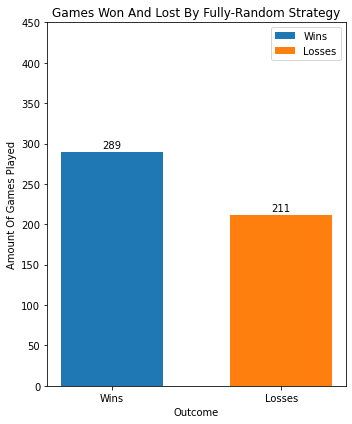

In [13]:
wins_A = gamesWonRandom
losses_A = amountOfGamesPlayed - gamesWonRandom

# data
categories = ['Wins', 'Losses']
values = [wins_A, losses_A]
bar_width = 0.6

# plot
plt.figure(figsize=(5, 6))
plt.bar("Wins", values[0], bar_width, label='Wins')
plt.bar("Losses", values[1], bar_width, label='Losses')

# labeling bars
for i in range(len(categories)):
    plt.text(i, values[i] + 5, str(values[i]), ha='center')

# title and labels
plt.title('Games Won And Lost By Fully-Random Strategy')
plt.xlabel('Outcome')
plt.ylabel('Amount Of Games Played')
plt.yticks(range(0, amountOfGamesPlayed, 50))  # adjust the range

# adding legend
plt.legend(categories, loc='upper right')

# show plot
plt.tight_layout()
plt.show()

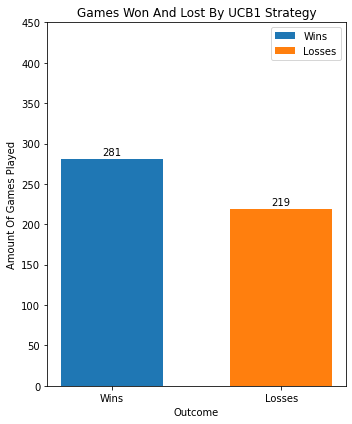

In [14]:
wins_B = gamesWonUCB1
losses_B = amountOfGamesPlayed - gamesWonUCB1

# data
categories = ['Wins', 'Losses']
values = [wins_B, losses_B]
bar_width = 0.6

# plot
plt.figure(figsize=(5, 6))
plt.bar("Wins", values[0], bar_width, label='Wins')
plt.bar("Losses", values[1], bar_width, label='Losses')

# labeling bars
for i in range(len(categories)):
    plt.text(i, values[i] + 5, str(values[i]), ha='center')

# title and labels
plt.title('Games Won And Lost By UCB1 Strategy')
plt.xlabel('Outcome')
plt.ylabel('Amount Of Games Played')
plt.yticks(range(0, amountOfGamesPlayed, 50))  # adjust the range

# adding legend
plt.legend(categories, loc='upper right')

# show plot
plt.tight_layout()
plt.show()

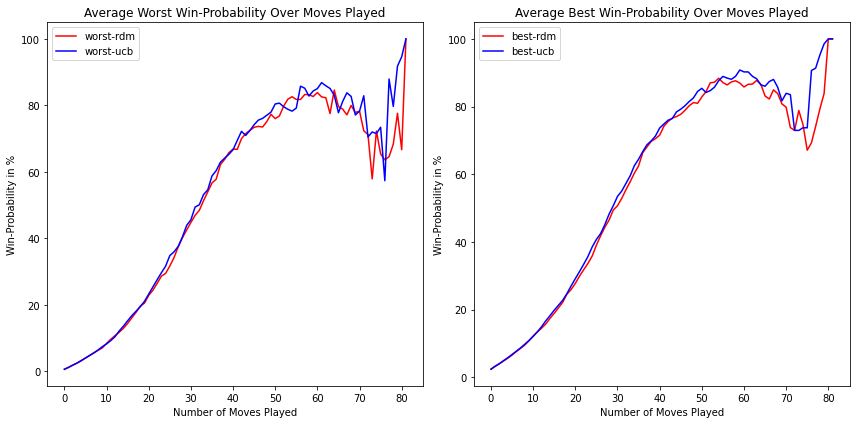

In [15]:
# generate x values
x = np.arange(len(finalWorstWinPercentageRandom))
x2 = np.arange(len(finalWorstWinPercentageUCB1))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(x, finalWorstWinPercentageRandom, label='worst-rdm', color='red')
axs[0].plot(x2, finalWorstWinPercentageUCB1, label='worst-ucb', color='blue')
axs[0].legend()
axs[0].set(xlabel='Number of Moves Played', ylabel='Win-Probability in %',
       title='Average Worst Win-Probability Over Moves Played')

axs[1].plot(x, finalBestWinPercentageRandom, label='best-rdm', color='red')
axs[1].plot(x2, finalBestWinPercentageUCB1,  label='best-ucb', color='blue')
axs[1].legend()
axs[1].set(xlabel='Number of Moves Played', ylabel='Win-Probability in %',
       title='Average Best Win-Probability Over Moves Played')

plt.tight_layout()
plt.show()

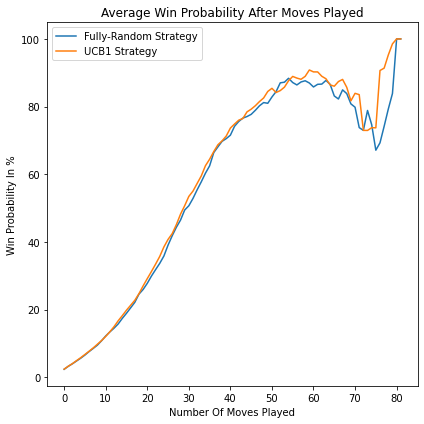

In [16]:
# generate x values
x = np.arange(len(finalWorstWinPercentageRandom))
x2 = np.arange(len(finalWorstWinPercentageUCB1))

colors = ["#2ca02c", "#1f77b4", "#ff7f0e"]

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, finalBestWinPercentageRandom, label='Fully-Random Strategy')
ax.plot(x2, finalBestWinPercentageUCB1,  label='UCB1 Strategy')
ax.legend()
ax.set(xlabel='Number Of Moves Played', ylabel='Win Probability In %',
       title='Average Win Probability After Moves Played')

plt.tight_layout()
plt.show()

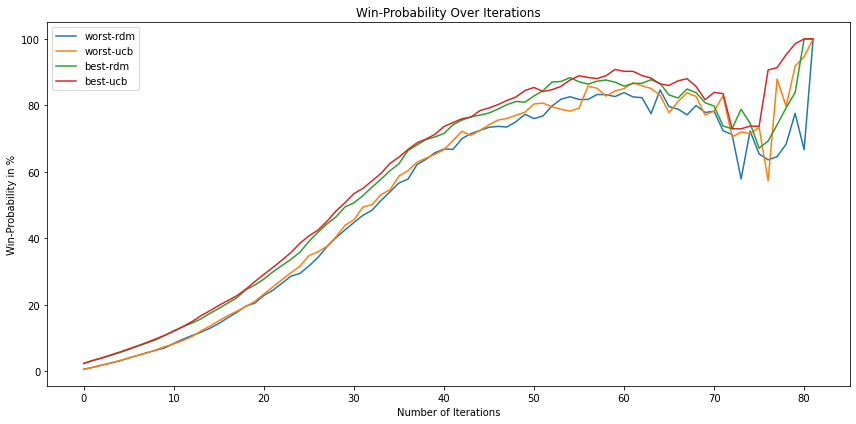

In [17]:
x = np.arange(len(finalWorstWinPercentageRandom))
x2 = np.arange(len(finalWorstWinPercentageUCB1))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, finalWorstWinPercentageRandom, label='worst-rdm')
ax.plot(x2, finalWorstWinPercentageUCB1, label='worst-ucb')
ax.legend()
ax.set(xlabel='Number of Iterations', ylabel='Win-Probability in %',
       title='Win-Probability Over Iterations')

ax.plot(x, finalBestWinPercentageRandom, label='best-rdm')
ax.plot(x2, finalBestWinPercentageUCB1,  label='best-ucb')
ax.legend()
ax.set(xlabel='Number of Iterations', ylabel='Win-Probability in %',
       title='Win-Probability Over Iterations')

plt.tight_layout()
plt.show()

average random time: 44.743933946078414
average ucb1 time: 45.10342015931374
fastest random time: 15.06465
fastest ucb1 time: 16.43531666666667
slowest random time: 98.25916666666667
slowest ucb1 time: 89.8079


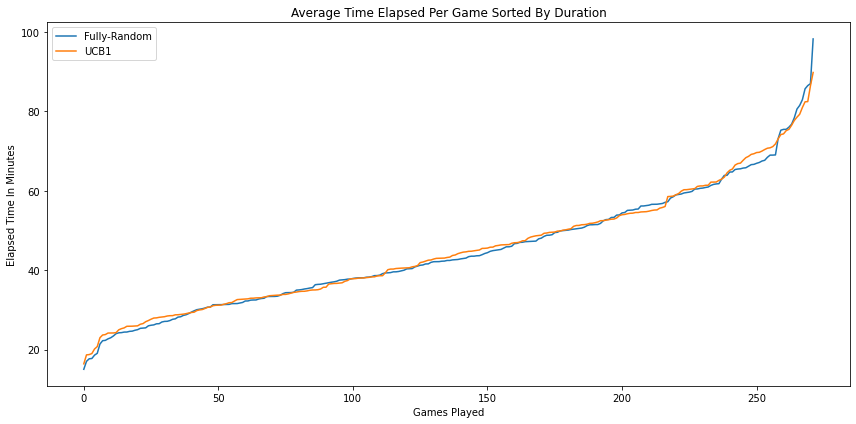

In [19]:
time_random = []
time_ucb = []

# map over random and find game in ucb1
for game in randomGames:
    game_id = game['gameID']  # accessing the gameID property
    found = False
    
    gameUCB = {}
    # iterating over the second list to find the gameID
    for game2 in UCB1Games:
        if game2['gameID'] == game_id:
            found = True
            gameUCB = game2
            break  # exit the loop once the gameID is found
    
    if not found:
        continue  # skip to the next iteration if the gameID is not found
    
    resultHistoryRandom = game.get("resultsHistory")
    timeTakenRandom = 0
    for index in range(len(resultHistoryRandom)):
        result = resultHistoryRandom[index]
        timeTakenRandom+=result['duration']
    
    time_random.append(timeTakenRandom / 1000 / 60)
    
    resultHistoryUCB = game2.get("resultsHistory")
    timeTakenUCB = 0
    for index in range(len(resultHistoryUCB)):
        result = resultHistoryUCB[index]
        timeTakenUCB+=result['duration']

    time_ucb.append(timeTakenUCB / 1000 / 60)
    
    
print("average random time:", sum(time_random) / len(time_random))
print("average ucb1 time:", sum(time_ucb) / len(time_ucb))

print("fastest random time:", sorted(time_random)[0])
print("fastest ucb1 time:", sorted(time_ucb)[0])

print("slowest random time:", sorted(time_random)[len(time_random)-1])
print("slowest ucb1 time:", sorted(time_ucb)[len(time_ucb)-1])

fig, ax = plt.subplots(figsize=(12, 6))
# plotting both arrays
ax.plot(sorted(time_random), label='Fully-Random')
ax.plot(sorted(time_ucb), label='UCB1')

# adding labels and title
ax.set(xlabel='Games Played', ylabel='Elapsed Time In Minutes',
       title='Average Time Elapsed Per Game Sorted By Duration')

# adding legend
ax.legend()

# fisplaying the plot
plt.tight_layout()
plt.show()


In [20]:
games = []
for key, value in data.items():
    if(value.get("gameType") != "Full-Random"):
        continue
    
    games.append(value.get("gameID"))
    

duplicates = set([x for x in games if games.count(x) > 1])
print("games: ", len(games))
print("duplicate games: ", len(duplicates))

games:  500
duplicate games:  0


In [21]:
impossibleGames = []
for key, value in data.items():
    if(value.get("gameStatus") != "impossible"):
        continue
    
    impossibleGames.append(value.get("gameType"))
    print("impossible game: ", value.get("gameType"))
    
print("impossible games: ", len(impossibleGames))

impossible games:  0


In [24]:
amountOfPromisingGamesRandom = 0
amountOfPromisingGamesUCB1 = 0

promisingGamesAll = []
promisingGamesRandom = []
promisingGamesUCB1 = []

for key, value in data.items():
    if(value.get("gameStatus") != "lost"):
        continue
        
    # Random: calculate statistics
    if(value.get("gameType") == "Full-Random"):
        if "playedMoves" in value:
            amountOfPromisingGamesRandom+=1
            promisingGamesRandom.append(value["gameID"])
            promisingGamesAll.append(value["gameID"])
        
            
    # UCB1: calculate statistics 
    if(value.get("gameType") == "UCB1"):
        if "playedMoves" in value:
            amountOfPromisingGamesUCB1+=1
            promisingGamesUCB1.append(value["gameID"])
            promisingGamesAll.append(value["gameID"])

print("amountOfPromisingGamesRandom", amountOfPromisingGamesRandom)
print("amountOfPromisingGamesUCB1", amountOfPromisingGamesUCB1)

set1 = set(promisingGamesRandom)
set2 = set(promisingGamesUCB1)
set3 = set(promisingGamesAll)

intersection = set1.intersection(set2)
    
print("----------")
print("games that both strategies lost:", len(intersection))

print("games that ony random strategy won:", amountOfPromisingGamesRandom - len(intersection))
print("games that ony ucb1 strategy won:", amountOfPromisingGamesUCB1 - len(intersection))

amountOfPromisingGamesRandom 36
amountOfPromisingGamesUCB1 42
----------
games that both strategies lost: 20
games that ony random strategy won: 16
games that ony ucb1 strategy won: 22


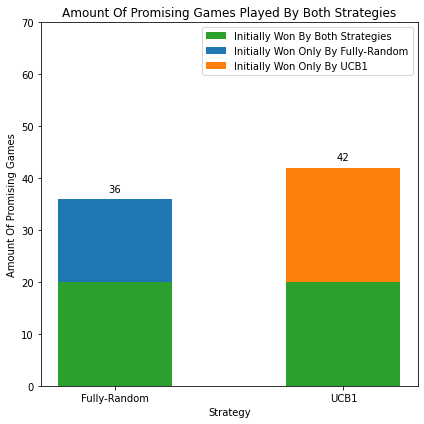

In [28]:
import matplotlib.pyplot as plt

strategy = (
    "Fully-Random",
    "UCB1",
)

promising_values = {
    "Initially Won By Both Strategies": np.array([len(intersection), len(intersection)]),
    "Initially Won Only By Fully-Random": np.array([amountOfPromisingGamesRandom - len(intersection), 0]),
    "Initially Won Only By UCB1": np.array([0, amountOfPromisingGamesUCB1 - len(intersection)]),
}

colors = ["#2ca02c", "#1f77b4", "#ff7f0e"]

width = 0.5

fig, ax = plt.subplots(figsize=(6, 6))
bottom = np.zeros(2)

for idx, (label, promising_value) in enumerate(promising_values.items()):
    color = colors[0] if idx == 0 else colors[1] if idx == 1 else colors[2]
    p = ax.bar(strategy, promising_value, width, label=label, color=color, bottom=bottom)
    bottom += promising_value
    # label bars value
    for i, value in enumerate(promising_value):
        if value == 0:
            continue
        if value == 20:
            continue
        ax.text(i, value + 21, str(value + len(intersection)), ha='center', va='bottom')

ax.set_title("Amount Of Promising Games Played By Both Strategies")
ax.legend(loc="upper right")

plt.xlabel('Strategy')
plt.ylabel('Amount Of Promising Games')
plt.yticks(range(0, 80, 10))  # adjust the range

plt.tight_layout()
plt.show()
